# Introduction
This is the traditional Titanic ML dataset, that is most commonly used used to build prediction models to answer the question "what sorts of people are more likely to survive the ship wreck". In this notebook, I will look at performing descriptive statistics to understand data features.    
        
        
I will use the python data science libraries - Numpy, Pandas, Scipy and Matplotlib for descriptivie analysis. 
  
- Numpy to manipulate homogenous array data using ndarray function. It is preferred for its computational speed on efficient storage and manipulation of dense data arrays.  
- Pandas provides DataFrames to store and manipulate columnar heterogenous data    
- Scipy for scientific computing  
- Matplotlib for data visulization of publication quality   

In [125]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#### I have saved my file in my working directory itself, so I do not provide any path. I read the file using pandas function, that stores it as a data frame. I will follow that with exploratory analysis on the data set

In [126]:
data = pd.read_csv("train.csv") 

In [127]:
data.shape ## prints dimensions of the data frame

(891, 12)

In [128]:
data.dtypes ## Any characters or mixed data type reccords are indicated as object data type.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [129]:
data.count() ## gives count of rows that have data in it, we can see that Age and Cabin has missing values

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [130]:
data.head(5) ## prints top 5 rows. This lets us know the way observations are included

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
data.duplicated() ## It returns boolean values to indicate any duplicate records

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [132]:
data[data.duplicated()] ## will return duplicate records, in our case none

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [133]:
data['Survived'].value_counts() # distribution of our data within the column Survived

0    549
1    342
Name: Survived, dtype: int64

In [134]:
data.isna().sum() ## missing values, we can also use notnull(), isnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [135]:
# We will drop certain columns such as Name, Ticket #, Embarked, cabin and fare as they are not required
data = data.drop(["Name", "Ticket", "Fare", "Cabin", "Embarked", "PassengerId"], axis = 1)

In [136]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [137]:
## Summary Statistics for each variable
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


[[<matplotlib.axes._subplots.AxesSubplot object at 0x11c4b9510>]]


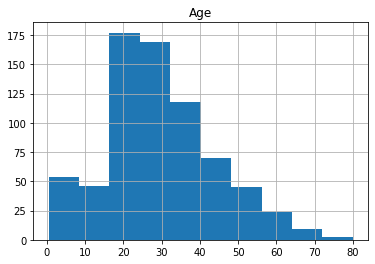

In [138]:
print(data.hist(column = 'Age'))


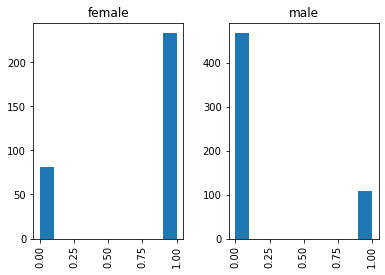

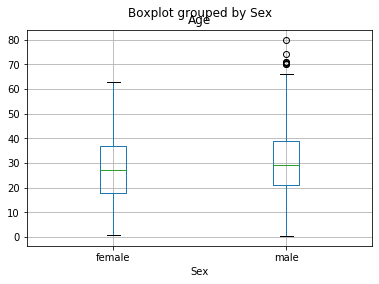

In [143]:
data.hist(column = 'Survived', by = 'Sex')
data['Sex'].value_counts() ## Approximately we can say that females have higher survival rate
data.boxplot(column = 'Age', by = 'Sex')

3    491
1    216
2    184
Name: Pclass, dtype: int64

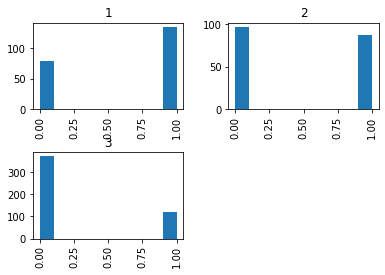

In [144]:
data.hist(column = 'Survived', by = 'Pclass')
data['Pclass'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

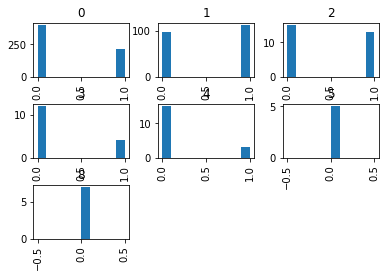

In [146]:
data.hist(column = 'Survived', by = 'SibSp')
data['SibSp'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

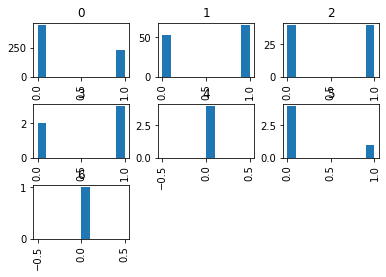

In [147]:
data.hist(column = 'Survived', by = 'Parch')
data['Parch'].value_counts()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ca00850>,
      dtype=object)

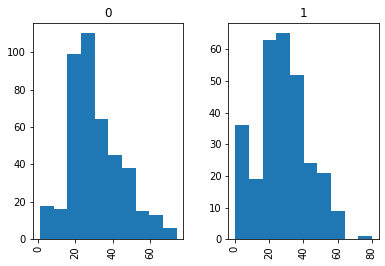

In [148]:
data.hist(column = 'Age', by = 'Survived') ## It does not give a clear difference between Age and Survival rate

In [152]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000


In [157]:
Sex = {'male':0, 'female':1}  ## Creating a dict to replace Sex values as 1 and 0 in the dataset
data.Sex = [Sex[item] for item in data.Sex]

In [159]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000


### So finally we observe that Sex has major effect on the survival rate followed by passenger class. Females and 1st passenger class have higher survival rate as compared to others.